In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 64
IMG_SIZE = 256
EPOCHS = 10

### Create TF Input Pipeline

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
     "DataSets/PlantVillage",
     image_size = (IMG_SIZE,IMG_SIZE),
     batch_size = BATCH_SIZE,
     shuffle = True
)


Found 2152 files belonging to 3 classes.


In [4]:
dataset.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)
# 68*32 = 2176 nearly equle to 2152(Total size in dataset).....slightly more as last batch is incompletely

34

* train data 80%
* test data 10%
* validation data 10%

In [6]:
train_size = 0.8
len(dataset)*train_size

27.200000000000003

In [7]:
def split_dataset(ds,train_split = 0.8,test_split = 0.1,val_split = 0.1, shuffle = True, shuffle_size = 10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed = 12)
    train_size =  int(ds_size*train_split)
    val_size =  int(ds_size*val_split)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,test_ds,val_ds

In [8]:
train_ds,test_ds,val_ds = split_dataset(dataset)

In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [10]:
resize_and_rescale = tf.keras.Sequential([
    
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE,IMG_SIZE),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [11]:
data_augmentation = tf.keras.Sequential([
    
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In [12]:
RGB = 3
input_shape = (BATCH_SIZE,IMG_SIZE,IMG_SIZE,RGB)
n_classes = len(dataset.class_names)

In [13]:
model = tf.keras.models.Sequential([
    resize_and_rescale,
    data_augmentation,
    tf.keras.layers.Conv2D(32,(3,3), activation = "relu", input_shape = input_shape),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3), activation = "relu" ),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3), activation = "relu" ),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3), activation = "relu" ),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3), activation = "relu" ),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3), activation = "relu" ),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(n_classes,activation = "softmax")
    
])
model.build(input_shape = input_shape)

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (64, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (64, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (64, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (64, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (64, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (64, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (64, 60, 60, 64)         

In [15]:
model.compile(

    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
    
)

In [16]:
performance = model.fit(
    train_ds,epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/10
27/27 [==============================] - 156s 6s/step - loss: 0.9122 - accuracy: 0.4664 - val_loss: 0.8418 - val_accuracy: 0.6406
Epoch 2/10
27/27 [==============================] - 147s 5s/step - loss: 0.7388 - accuracy: 0.6522 - val_loss: 0.7313 - val_accuracy: 0.6667
Epoch 3/10
27/27 [==============================] - 147s 5s/step - loss: 0.5625 - accuracy: 0.7720 - val_loss: 0.6896 - val_accuracy: 0.6719
Epoch 4/10
27/27 [==============================] - 148s 5s/step - loss: 0.4470 - accuracy: 0.8194 - val_loss: 0.4551 - val_accuracy: 0.8385
Epoch 5/10
27/27 [==============================] - 147s 5s/step - loss: 0.2575 - accuracy: 0.9091 - val_loss: 0.2799 - val_accuracy: 0.8802
Epoch 6/10
27/27 [==============================] - 148s 5s/step - loss: 0.3456 - accuracy: 0.8530 - val_loss: 0.2575 - val_accuracy: 0.9062
Epoch 7/10
27/27 [==============================] - 147s 5s/step - loss: 0.1799 - accuracy: 0.9329 - val_loss: 0.1632 - val_accuracy: 0.9375
Epoch 8/10
27

In [18]:
performance.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
train_acc = performance.history['accuracy']
val_acc = performance.history['val_accuracy']
train_loss = performance.history['loss']
val_loss = performance.history['val_loss']

Text(0.5, 1.0, 'training and validation loss')

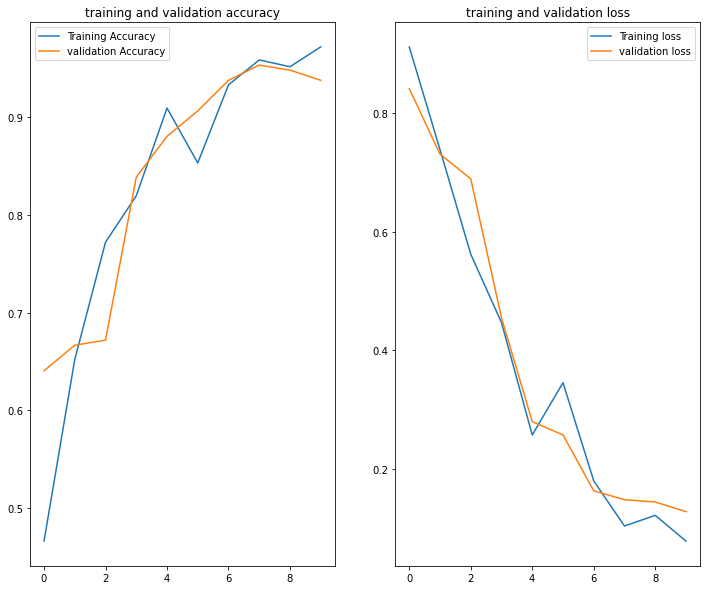

In [37]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.plot(train_acc,label = 'Training Accuracy')
plt.plot(val_acc,label = 'validation Accuracy')
plt.legend()
plt.title("training and validation accuracy")
 
plt.subplot(1,2,2)
plt.plot(train_loss,label = 'Training loss')
plt.plot(val_loss,label = 'validation loss')
plt.legend()
plt.title("training and validation loss")

In [38]:
scores = model.evaluate(test_ds)

4/4 [==============================] - 10s 1s/step - loss: 0.0937 - accuracy: 0.9570


In [39]:
scores

[0.09366416186094284, 0.95703125]

Actual Label:  Potato___Late_blight
Model Prediction:  Potato___Late_blight


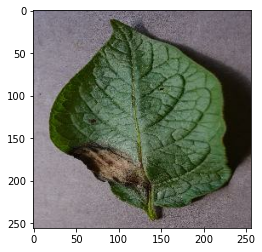

In [60]:
for img_batch,label_batch in test_ds.take(1):
    first_img =  img_batch[0].numpy().astype("uint8")
    first_label = label_batch[0]
    
    plt.imshow(first_img)
    print("Actual Label: ",dataset.class_names[first_label])
    predicted_label = model.predict(img_batch)
    print("Model Prediction: ",dataset.class_names[np.argmax(predicted_label[0])])
    
     

In [62]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [63]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    predicted_label = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_label,confidence
    

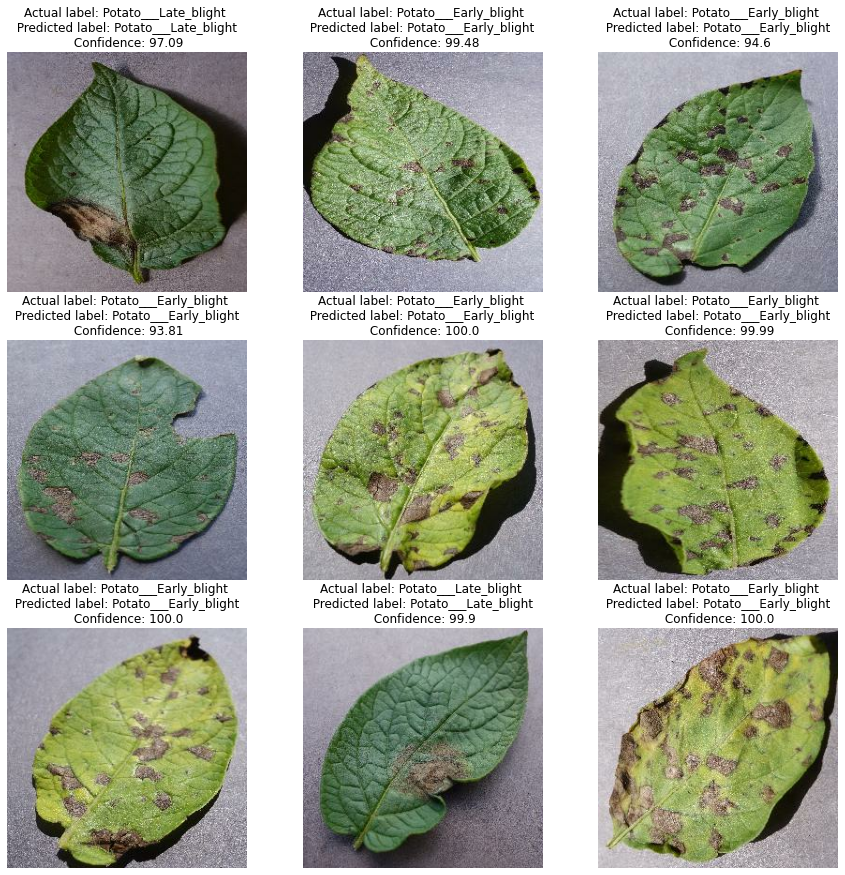

In [78]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_label,confidence = predict(model,images[i])
        actual_label = dataset.class_names[labels[i]]
        plt.axis('off')
        plt.title(f"Actual label: {actual_label} \n Predicted label: {predicted_label} \n Confidence: {confidence}")
    

In [84]:
import os
model_version = max([int(i) for i in os.listdir("./P7Models") + [0]])+1

In [85]:
# model.save(f"./P7Models/{model_version}")

INFO:tensorflow:Assets written to: ./P7Models/1\assets
